<a href="https://colab.research.google.com/github/wilosaurus/PCVK_2241720171/blob/main/Meet5_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICUM**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**[1]**

 Gamma Correction pada citra 
--------------------------------
Masukkan nilai Gamma: 3


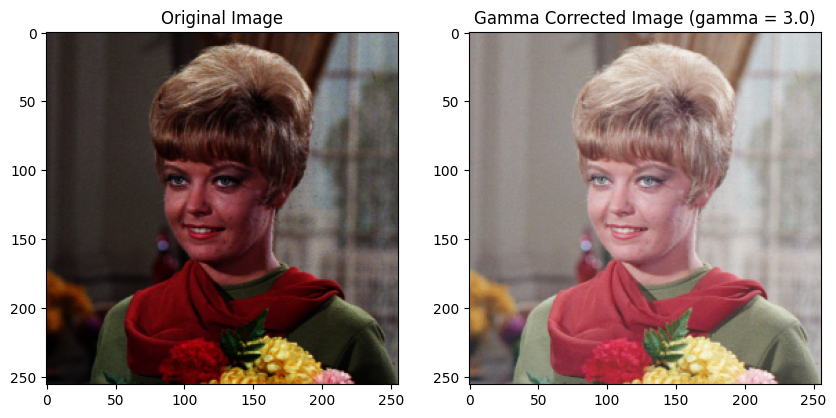

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

print(' Gamma Correction pada citra ')
print('--------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number!')
    exit()

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/image/female.tiff')

# Memeriksa apakah gambar berhasil dibaca
if image is None:
    print("Gambar tidak ditemukan, pastikan path gambar benar.")
    exit()

# Mengubah gamma
adjusted_image = gamma_correction(image, gamma)

# Menampilkan gambar asli dan gambar yang telah dikoreksi gamma
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title(f'Gamma Corrected Image (gamma = {gamma})')
plt.imshow(cv.cvtColor(adjusted_image, cv.COLOR_BGR2RGB))

plt.show()


**[2]**

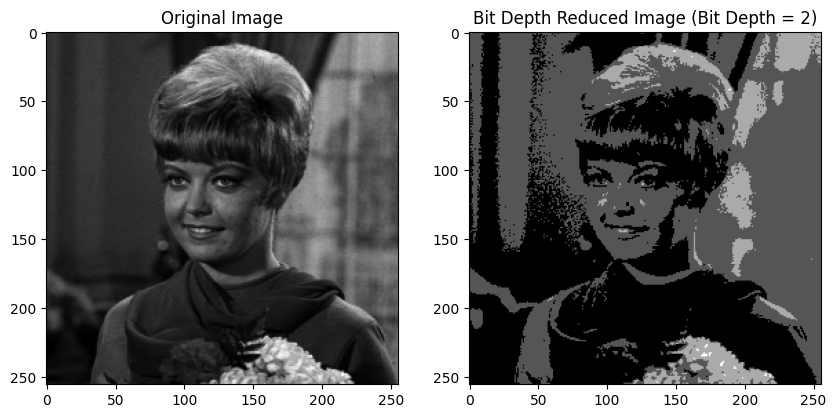

In [ ]:
import cv2 as cv

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('/content/drive/MyDrive/image/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.round(original / level) * level

# Menampilkan gambar asli dan gambar dengan kedalaman bit yang lebih rendah
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original, cmap='gray')  # Karena gambar grayscale, gunakan cmap='gray'

plt.subplot(1, 2, 2)
plt.title(f'Bit Depth Reduced Image (Bit Depth = {bit_depth})')
plt.imshow(depth_image, cmap='gray')

plt.show()

**[3]**

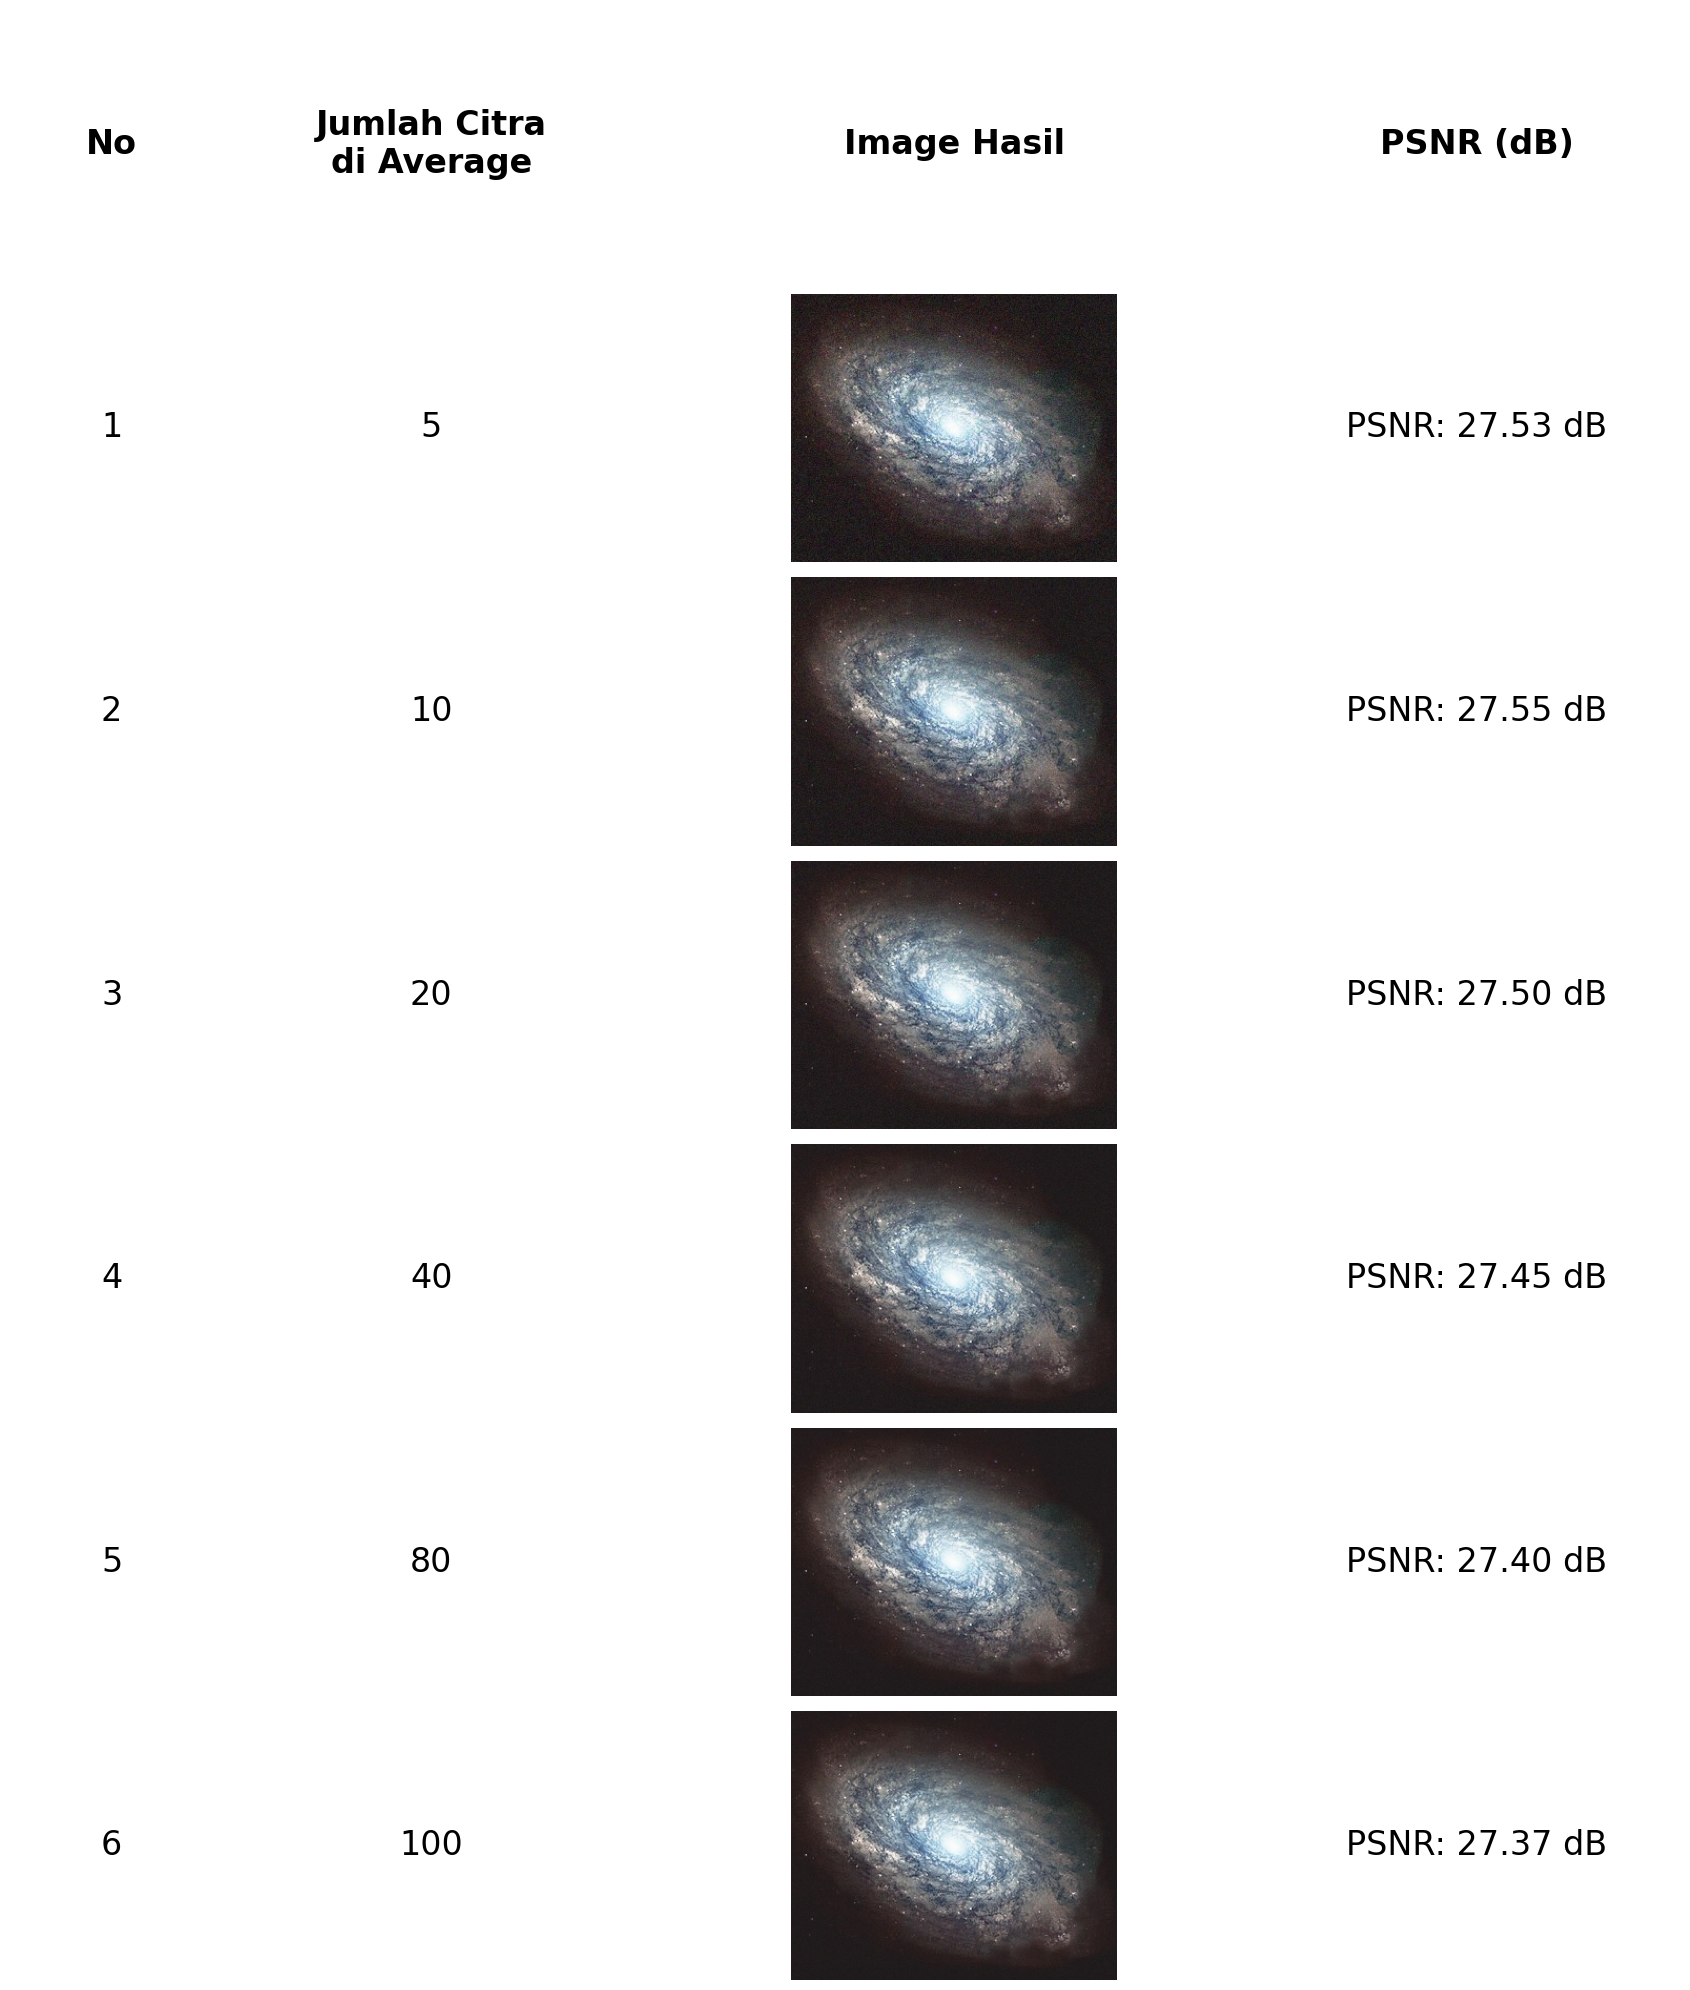

In [ ]:
import cv2 as cv
import numpy as np
import glob
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

# Function to calculate PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:  # Means no noise is present in the image
        return float('inf')
    psnr = 20 * np.log10(255.0 / np.sqrt(mse))
    return psnr

# Load original image (the clean reference)
original_image = cv.imread('/content/drive/MyDrive/image/galaxy.jpg')

# Define how many noisy images to average (e.g., 5, 10, 20, 40, 80, 100)
noisy_counts = [5, 10, 20, 40, 80, 100]

# Prepare the table for storing PSNR values
psnr_results = []
average_images = []

# Load and process images based on different counts
for count in noisy_counts:
    # Load 'count' number of noisy images
    cv_img = []
    for img in glob.glob('/content/drive/MyDrive/image/noises/*.jpg')[:count]:
        n = cv.imread(img)
        if n is not None:
            cv_img.append(n)

    # Average the noisy images
    average_image = np.mean(cv_img, axis=0).astype(np.uint8)
    average_images.append(average_image)

    # Calculate PSNR for the averaged image
    psnr_value = calculate_psnr(original_image, average_image)
    psnr_results.append(psnr_value)

# Plot the table with images and PSNR values
fig = plt.figure(figsize=(17, 20))
gs = GridSpec(7, 4, width_ratios=[0.5, 1, 1.5, 1])  # Adjust width ratios here

# Add table headers
ax1 = plt.subplot(gs[0, 0])
ax1.text(0.5, 0.5, "No", horizontalalignment='center', verticalalignment='center', fontsize=24, weight='bold')
ax1.axis('off')

ax2 = plt.subplot(gs[0, 1])
ax2.text(0.5, 0.5, "Jumlah Citra\ndi Average", horizontalalignment='center', verticalalignment='center', fontsize=24, weight='bold')
ax2.axis('off')

ax3 = plt.subplot(gs[0, 2])
ax3.text(0.5, 0.5, "Image Hasil", horizontalalignment='center', verticalalignment='center', fontsize=24, weight='bold')
ax3.axis('off')

ax4 = plt.subplot(gs[0, 3])
ax4.text(0.5, 0.5, "PSNR (dB)", horizontalalignment='center', verticalalignment='center', fontsize=24, weight='bold')
ax4.axis('off')

# Display each row with number, noisy average image, and PSNR value
for i, count in enumerate(noisy_counts):
    # Column 1: No
    ax = plt.subplot(gs[i+1, 0])
    ax.text(0.5, 0.5, str(i+1), horizontalalignment='center', verticalalignment='center', fontsize=24)
    ax.axis('off')

    # Column 2: Jumlah Citra di Average
    ax = plt.subplot(gs[i+1, 1])
    ax.text(0.5, 0.5, str(count), horizontalalignment='center', verticalalignment='center', fontsize=24)
    ax.axis('off')

    # Column 3: Image Hasil
    ax = plt.subplot(gs[i+1, 2])
    ax.imshow(average_images[i], cmap=None)
    ax.axis('off')

    # Column 4: PSNR (dB)
    ax = plt.subplot(gs[i+1, 3])
    ax.text(0.5, 0.5, f'PSNR: {psnr_results[i]:.2f} dB', horizontalalignment='center', verticalalignment='center', fontsize=24)
    ax.axis('off')

plt.tight_layout()
plt.show()


Dari tabel di atas, dapat dilihat bahwa:


*   Nilai PSNR secara umum cukup tinggi, menunjukkan kualitas gambar yang baik.
*   Tidak ada peningkatan signifikan pada nilai PSNR setelah merata-ratakan 20 gambar.
*   Bahkan, ada sedikit penurunan nilai PSNR setelah merata-ratakan lebih dari 20 gambar.

Kesimpulan:

Berdasarkan data ini, dapat disimpulkan bahwa merata-ratakan 20 gambar sudah cukup untuk mendapatkan kualitas gambar yang baik. Menambahkan lebih banyak gambar tidak memberikan peningkatan yang signifikan, bahkan mungkin sedikit menurunkan kualitas gambar.

**[4]**

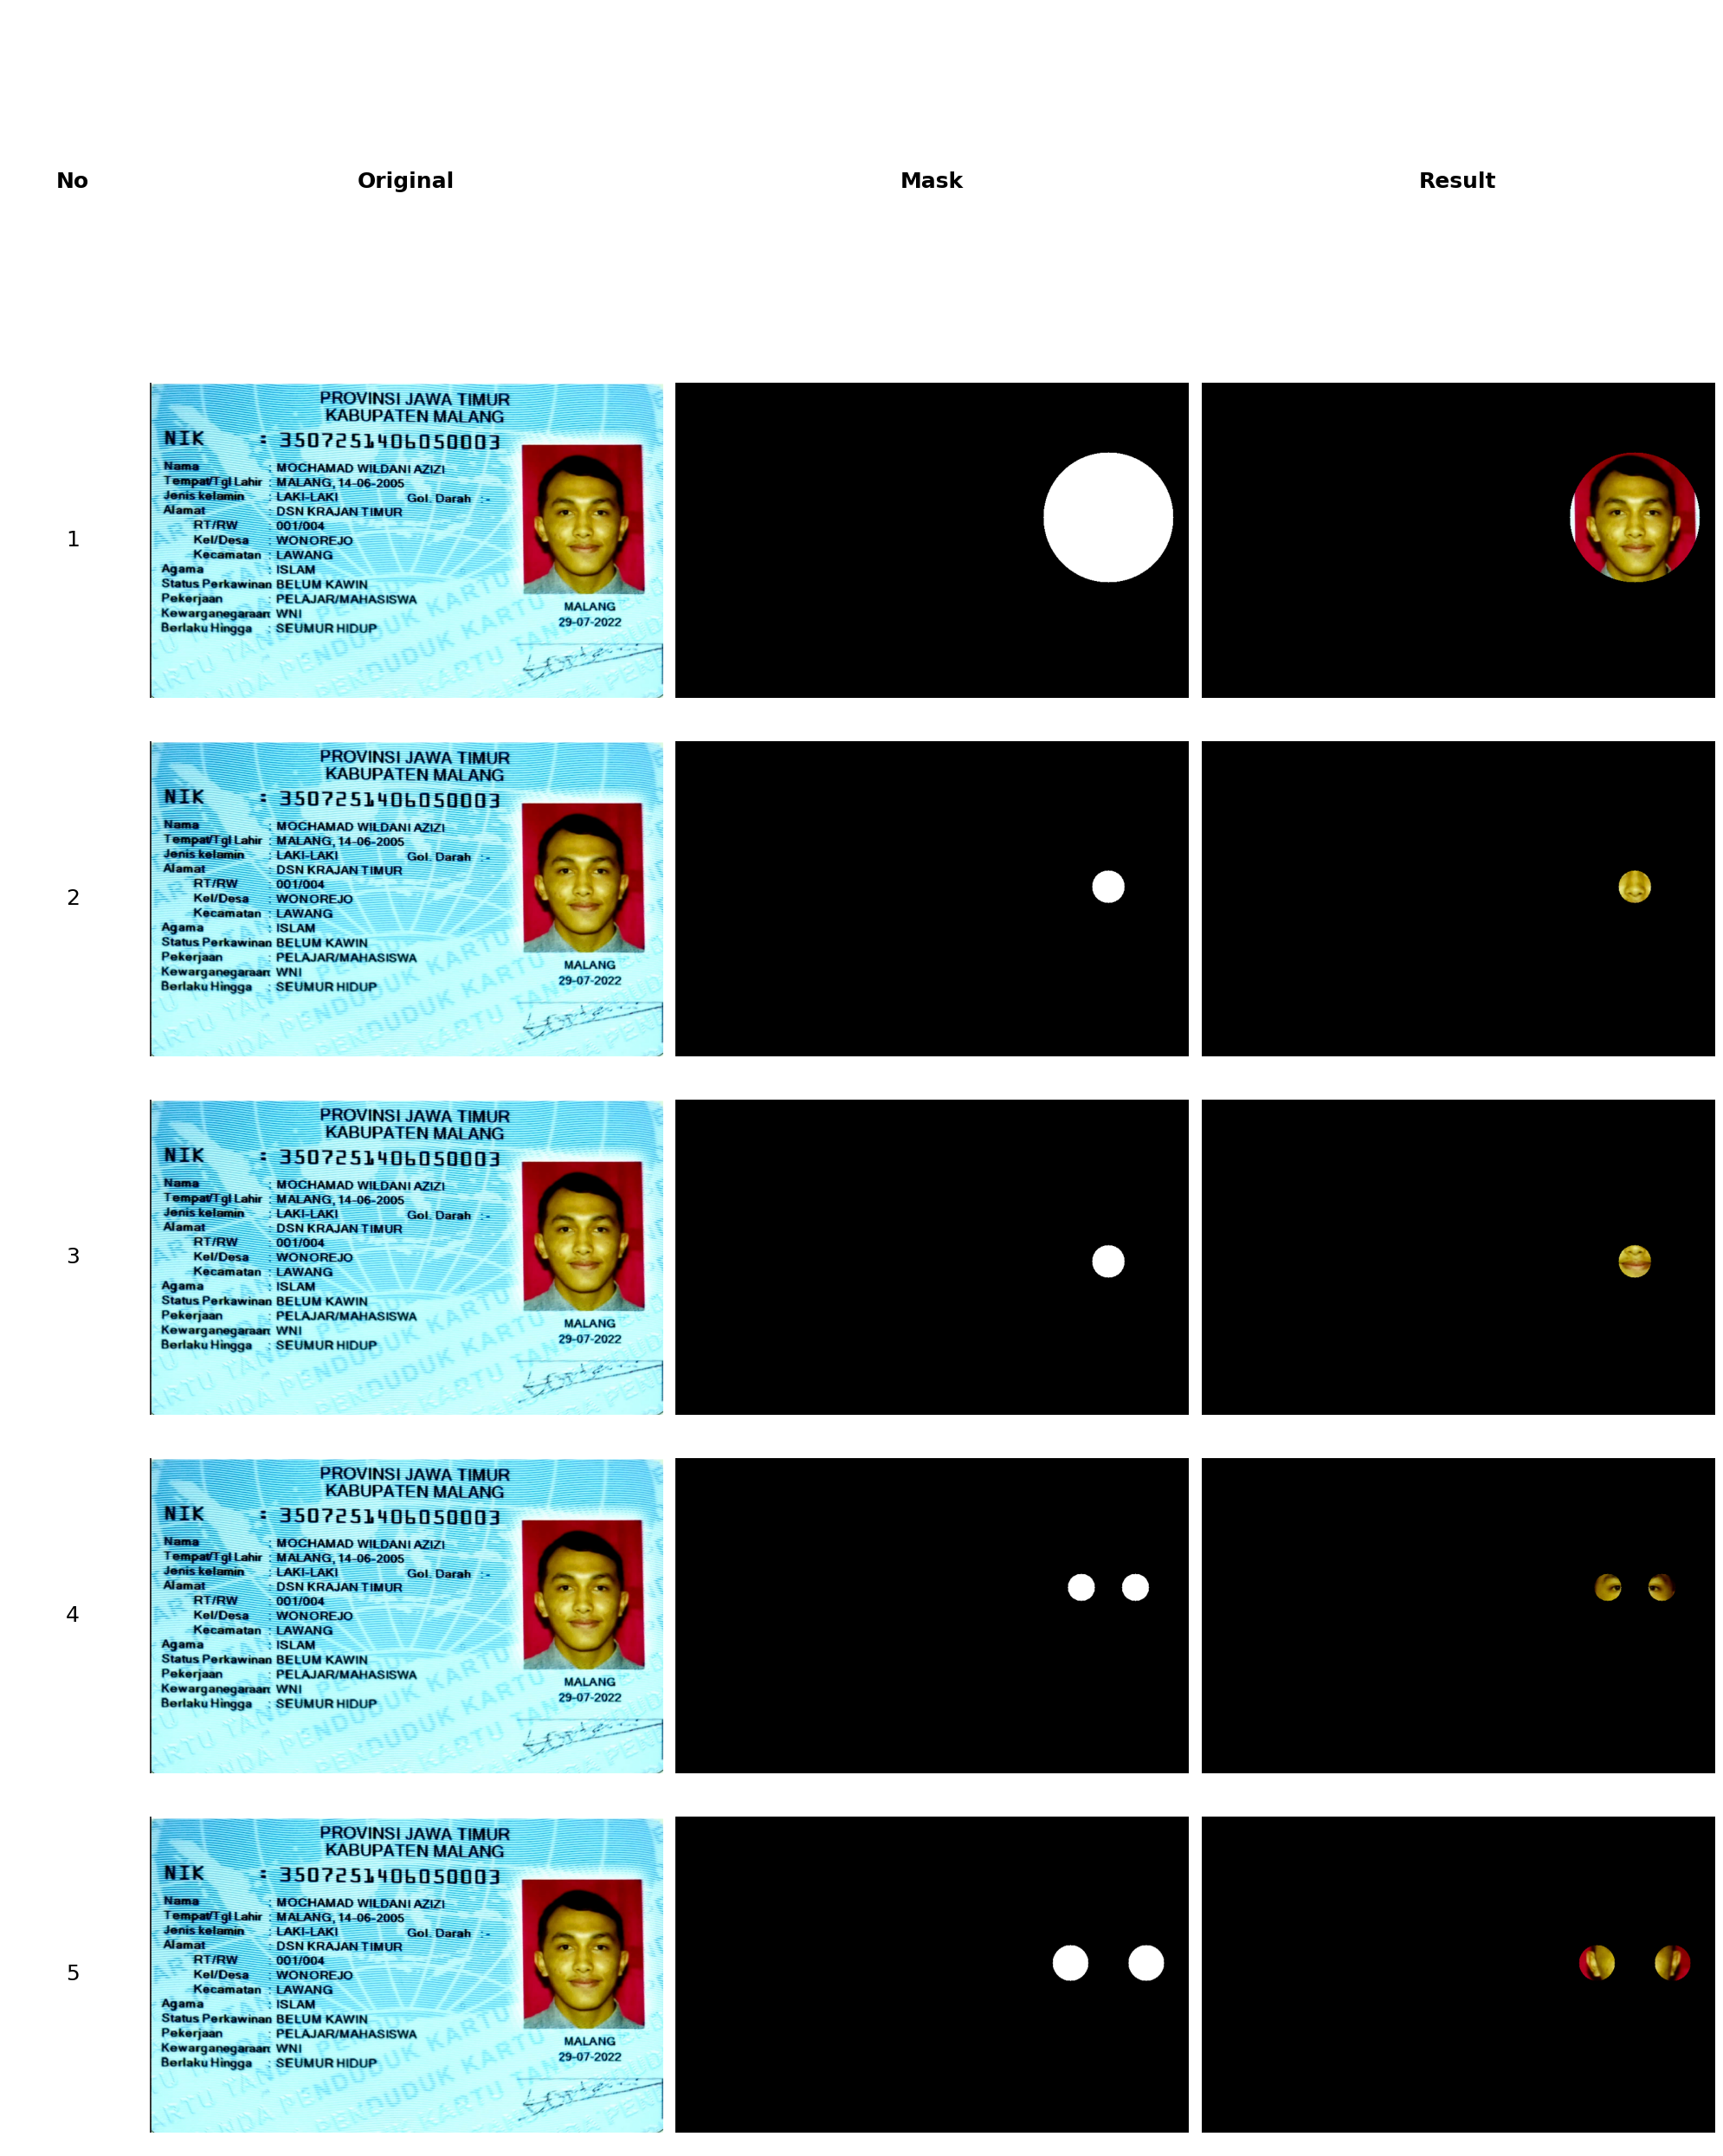

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

# Load the image (replace with your actual image path)
image = cv2.imread('/content/drive/MyDrive/image/ktp.png')

# Check if the image is loaded correctly
if image is None:
    print("Error loading image. Please check the file path.")
else:
    # Function to create a circle mask using the equation of a circle
    def create_circle_mask(height, width, center, radius):
        mask = np.zeros((height, width), dtype="uint8")
        h, k = center
        for y in range(height):
            for x in range(width):
                if (x - h)**2 + (y - k)**2 <= radius**2:
                    mask[y, x] = 255
        return mask

    # Create different masks (using the equation of a circle)
    mask_1 = create_circle_mask(image.shape[0], image.shape[1], (800, 250), 120)  # Large circle
    masked_image_1 = cv2.bitwise_and(image, image, mask=mask_1)

    mask_2 = create_circle_mask(image.shape[0], image.shape[1], (800, 270), 30)  # Smaller circle
    masked_image_2 = cv2.bitwise_and(image, image, mask=mask_2)

    mask_3 = create_circle_mask(image.shape[0], image.shape[1], (800, 300), 30)  # Tiny circle
    masked_image_3 = cv2.bitwise_and(image, image, mask=mask_3)

    mask_4 = create_circle_mask(image.shape[0], image.shape[1], (750, 240), 25)  # Two small circles
    mask_4 += create_circle_mask(image.shape[0], image.shape[1], (850, 240), 25)
    masked_image_4 = cv2.bitwise_and(image, image, mask=mask_4)

    mask_5 = create_circle_mask(image.shape[0], image.shape[1], (730, 270), 33)  # Two very small circles
    mask_5 += create_circle_mask(image.shape[0], image.shape[1], (870, 270), 33)
    masked_image_5 = cv2.bitwise_and(image, image, mask=mask_5)

    # Convert the original image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create figure for plotting
    fig = plt.figure(figsize=(20, 25))
    gs = GridSpec(6, 4, width_ratios=[0.5, 2, 2, 2])

    # Add table headers
    ax1 = plt.subplot(gs[0, 0])
    ax1.text(0.5, 0.5, "No", horizontalalignment='center', verticalalignment='center', fontsize=18, weight='bold')
    ax1.axis('off')

    ax2 = plt.subplot(gs[0, 1])
    ax2.text(0.5, 0.5, "Original", horizontalalignment='center', verticalalignment='center', fontsize=18, weight='bold')
    ax2.axis('off')

    ax3 = plt.subplot(gs[0, 2])
    ax3.text(0.5, 0.5, "Mask", horizontalalignment='center', verticalalignment='center', fontsize=18, weight='bold')
    ax3.axis('off')

    ax4 = plt.subplot(gs[0, 3])
    ax4.text(0.5, 0.5, "Result", horizontalalignment='center', verticalalignment='center', fontsize=18, weight='bold')
    ax4.axis('off')

    # Display rows with the original image, masks, and results
    masks = [mask_1, mask_2, mask_3, mask_4, mask_5]
    masked_images = [masked_image_1, masked_image_2, masked_image_3, masked_image_4, masked_image_5]

    for i, (mask, masked_image) in enumerate(zip(masks, masked_images)):
        # Column 1: No (number)
        ax = plt.subplot(gs[i+1, 0])
        ax.text(0.5, 0.5, str(i+1), horizontalalignment='center', verticalalignment='center', fontsize=18)
        ax.axis('off')

        # Column 2: Original Image
        ax = plt.subplot(gs[i+1, 1])
        ax.imshow(image_rgb)
        ax.axis('off')

        # Column 3: Mask
        ax = plt.subplot(gs[i+1, 2])
        ax.imshow(mask, cmap='gray')
        ax.axis('off')

        # Column 4: Result (masked image)
        masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        ax = plt.subplot(gs[i+1, 3])
        ax.imshow(masked_image_rgb)
        ax.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()


**[5]**

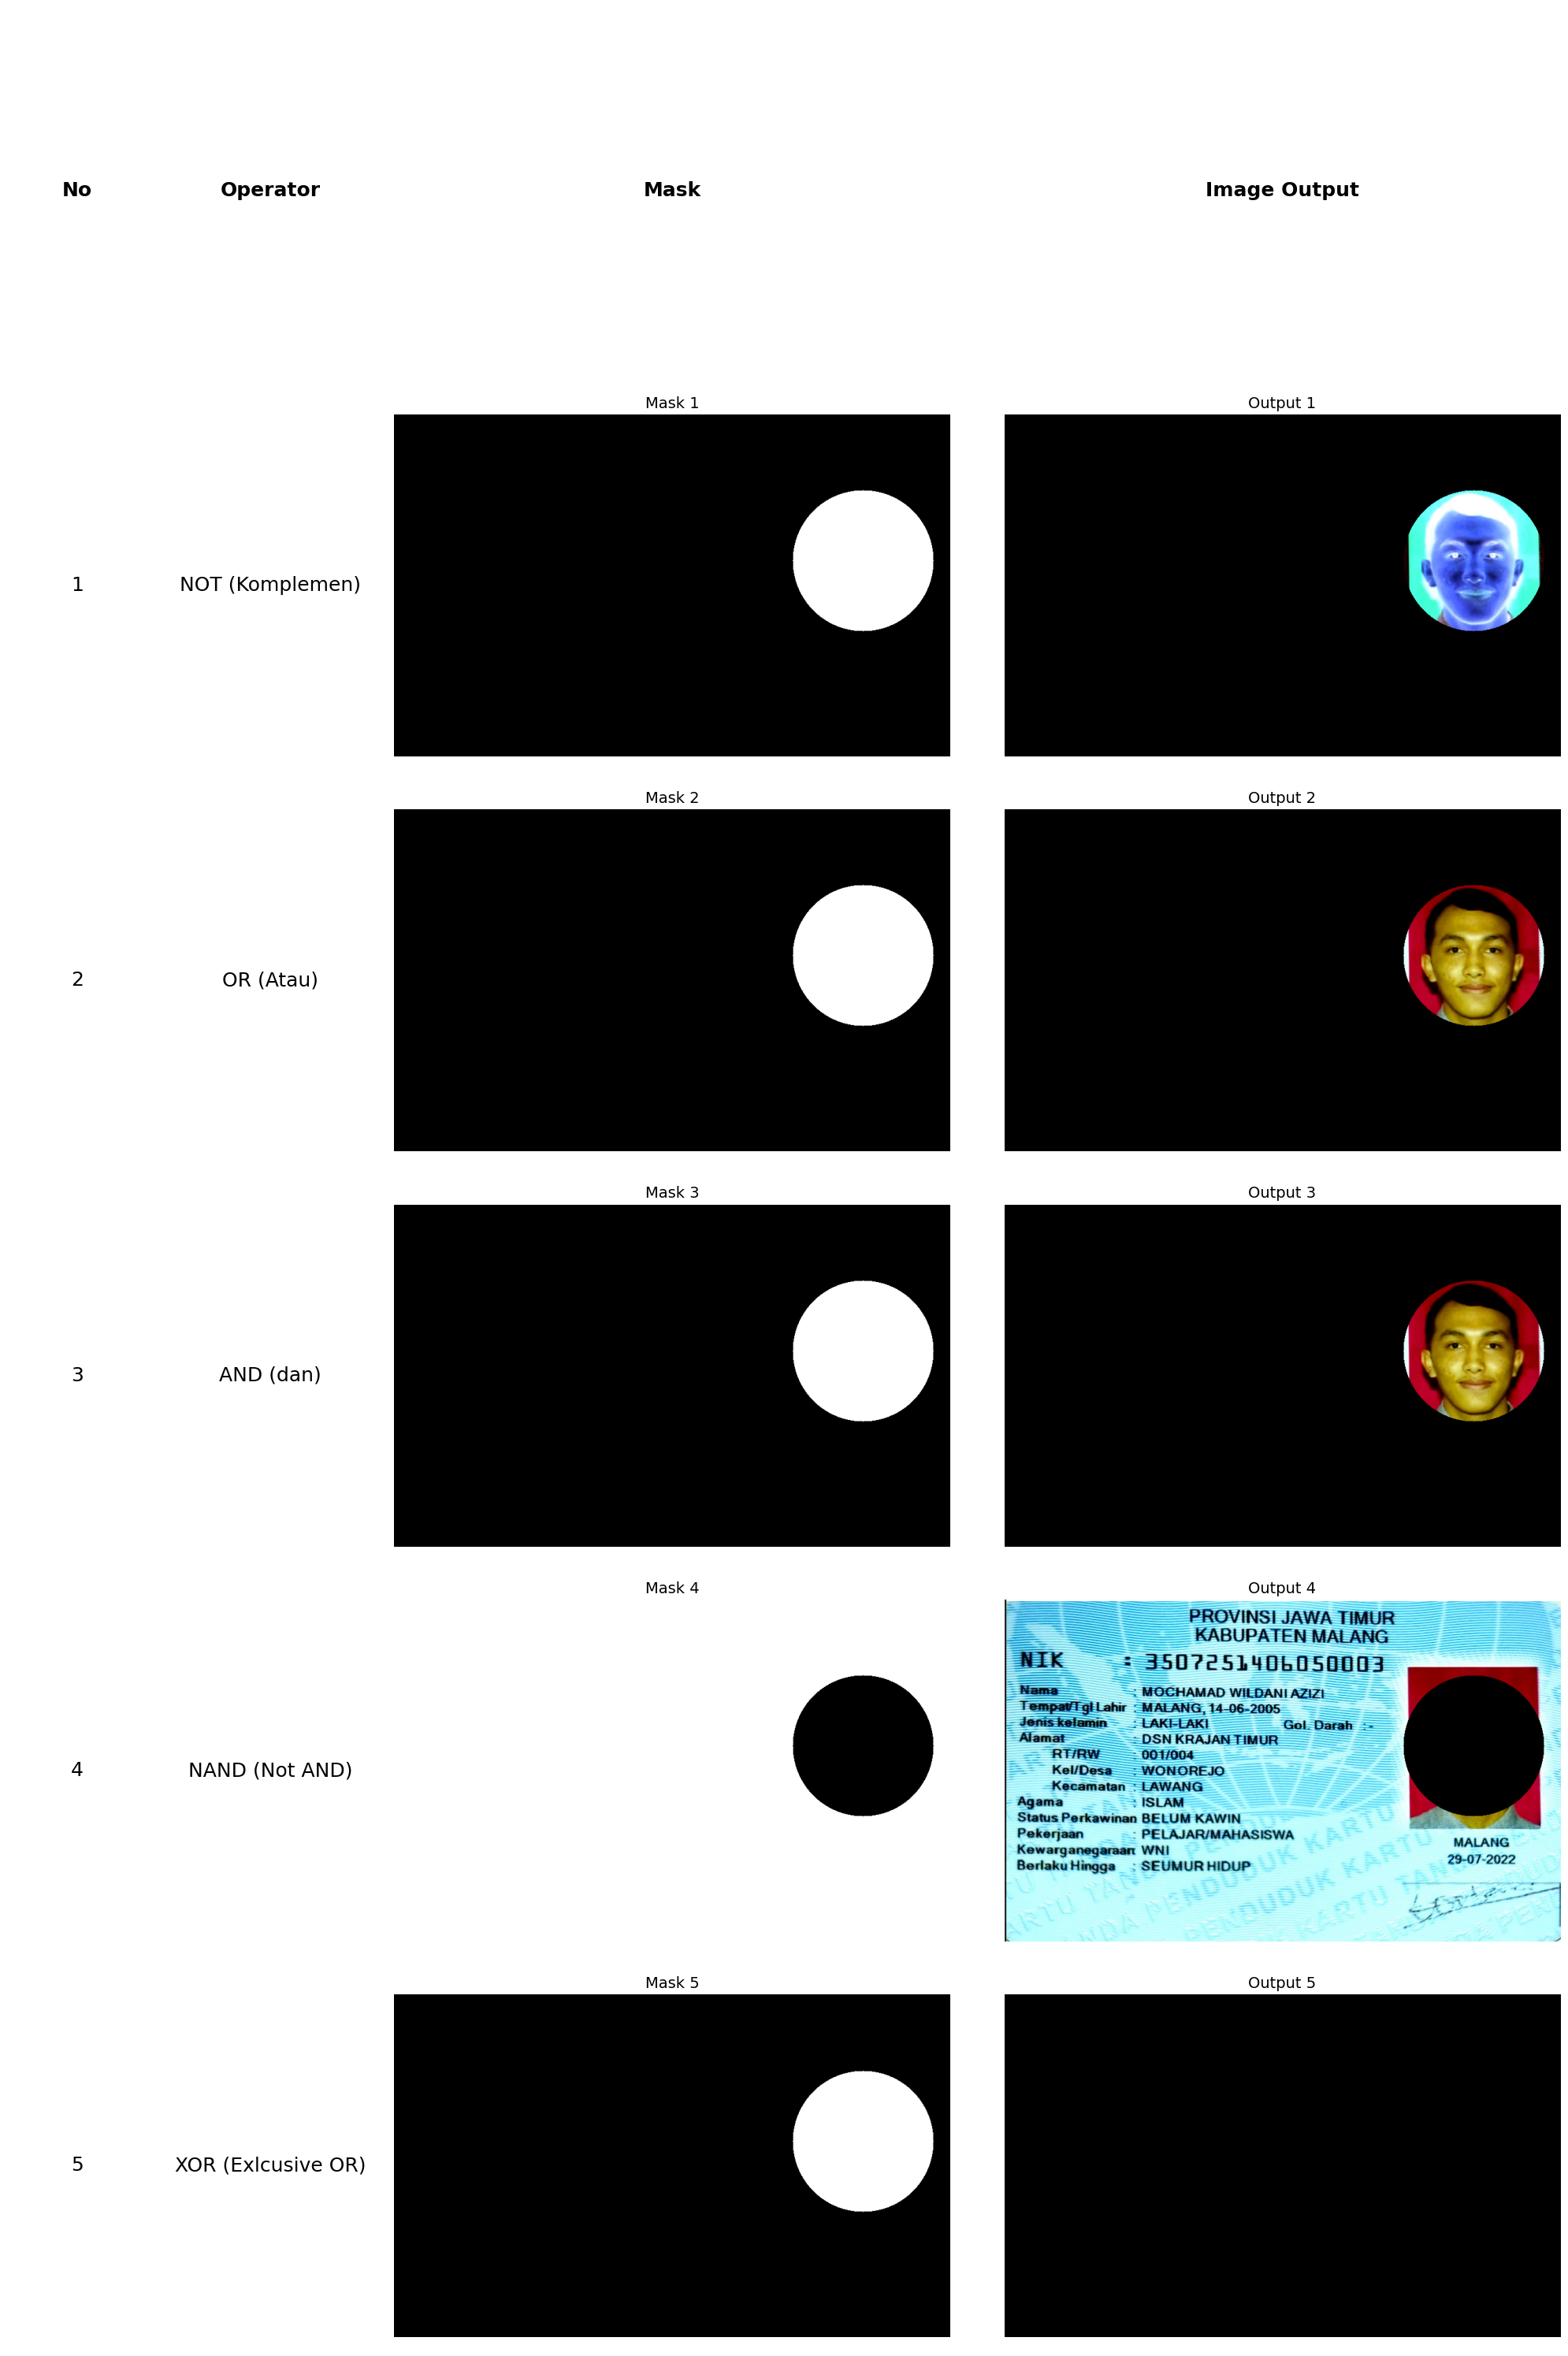

In [67]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

# Fungsi untuk membuat masker lingkaran yang dioptimalkan
def create_circle_mask(height, width, center, radius):
    Y, X = np.ogrid[:height, :width]
    dist_from_center = (X - center[0])**2 + (Y - center[1])**2
    mask = dist_from_center <= radius**2
    return (mask * 255).astype("uint8")

# Load the image (ganti dengan path gambar Anda)
image = cv2.imread('/content/drive/MyDrive/image/ktp.png')

# Cek apakah gambar berhasil dimuat
if image is None:
    print("Error loading image. Please check the file path.")
else:
    # Membuat beberapa masker
    center_point = (800, 250)  # Ganti sesuai kebutuhan
    radius_size = 120

    # Masker 1: NOT
    mask_1 = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)
    masked_image_1 = cv2.bitwise_not(image, mask=mask_1)

    # Masker 2: OR (menggunakan masker yang sama)
    mask_2 = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)
    masked_image_2 = cv2.bitwise_or(image, image, mask=mask_2)

    # Masker 3: AND (menggunakan masker yang sama)
    mask_3 = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)
    masked_image_3 = cv2.bitwise_and(image, image, mask=mask_3)

    # Masker 4: NAND
    # Membuat dua masker untuk operasi AND kemudian NOT
    mask4_a = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)
    mask4_b = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)

    # Operasi AND antara mask4_a dan mask4_b
    and_mask4 = cv2.bitwise_and(mask4_a, mask4_b)

    # Operasi NOT pada hasil AND untuk mendapatkan NAND
    nand_mask4 = cv2.bitwise_not(and_mask4)

    # Menerapkan masker NAND ke gambar asli
    masked_image_4 = cv2.bitwise_and(image, image, mask=nand_mask4)

    # Masker 5: XOR (menggunakan masker yang sama)
    mask_5 = create_circle_mask(image.shape[0], image.shape[1], center_point, radius_size)
    masked_image_5 = cv2.bitwise_xor(image, image, mask=mask_5)

    # Convert the original image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Membuat figure untuk plotting
    fig = plt.figure(figsize=(20, 30))
    gs = GridSpec(6, 4, width_ratios=[0.5, 0.5, 2, 2])

    # Menambahkan header tabel
    headers = ["No", "Operator", "Mask", "Image Output"]
    for i, header in enumerate(headers):
        ax = plt.subplot(gs[0, i])
        ax.text(0.5, 0.5, header, horizontalalignment='center', verticalalignment='center', fontsize=18, weight='bold')
        ax.axis('off')

    # Daftar operator dan masker
    operators = ["NOT (Komplemen)", "OR (Atau)", "AND (dan)", "NAND (Not AND)", "XOR (Exlcusive OR)"]
    masks = [mask_1, mask_2, mask_3, nand_mask4, mask_5]
    masked_images = [masked_image_1, masked_image_2, masked_image_3, masked_image_4, masked_image_5]

    for i, (operator, mask, masked_image) in enumerate(zip(operators, masks, masked_images)):
        row = i + 1

        # Kolom 1: No (nomor)
        ax = plt.subplot(gs[row, 0])
        ax.text(0.5, 0.5, str(i + 1), horizontalalignment='center', verticalalignment='center', fontsize=18)
        ax.axis('off')

        # Kolom 2: Operator
        ax = plt.subplot(gs[row, 1])
        ax.text(0.5, 0.5, operator, horizontalalignment='center', verticalalignment='center', fontsize=18)
        ax.axis('off')

        # Kolom 3: Mask
        ax = plt.subplot(gs[row, 2])
        ax.imshow(mask, cmap='gray')
        ax.set_title(f'Mask {i + 1}', fontsize=14)
        ax.axis('off')

        # Kolom 4: Hasil Operasi
        masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        ax = plt.subplot(gs[row, 3])
        ax.imshow(masked_image_rgb)
        ax.set_title(f'Output {i + 1}', fontsize=14)
        ax.axis('off')

    # Menampilkan plot
    plt.tight_layout()
    plt.show()


# **HASIL ANALISA**

---
## **1). Penerapan koreksi gamma pada citra**
1. Tujuan dan Metode
  * Tujuan: Kode ini bertujuan untuk melakukan koreksi gamma pada gambar, yang merupakan teknik untuk meningkatkan atau menurunkan kecerahan gambar. Koreksi gamma memungkinkan penyesuaian kontras yang lebih baik, terutama dalam area gelap dan terang gambar.
  * Metode:
    * Pengguna diminta untuk memasukkan nilai gamma yang diinginkan.
    * Fungsi gamma_correction dibuat untuk menghitung nilai pixel yang disesuaikan dengan menggunakan rumus `pixel=(𝑖/255)^1/𝛾 × 255`
    * Tabel pencarian (LUT) digunakan untuk mempercepat proses aplikasi koreksi gamma pada gambar.
    * Gambar asli dibaca dan kemudian diterapkan koreksi gamma menggunakan fungsi tersebut.
2. Input Pengguna
  * Nilai Gamma: Pengguna diminta untuk memasukkan nilai gamma, yang menentukan seberapa besar penyesuaian kecerahan yang akan diterapkan.
    * Nilai gamma lebih besar dari 1 akan menggelapkan gambar (mengurangi kecerahan), sementara nilai gamma kurang dari 1 akan mencerahkan gambar (meningkatkan kecerahan).
3. Hasil Operasi
  * Gambar Asli: Gambar asli ditampilkan dalam subplot pertama. Gambar ini merupakan representasi dasar tanpa penyesuaian, memberikan konteks tentang bagaimana gambar akan berubah.
  * Gambar yang Telah Dikoreksi Gamma: Gambar yang telah disesuaikan dengan gamma ditampilkan dalam subplot kedua.
    * Perubahan kecerahan dan kontras dapat terlihat secara jelas, bergantung pada nilai gamma yang dimasukkan.
    * Koreksi gamma yang tepat dapat meningkatkan detail dalam area yang sebelumnya gelap atau terlalu terang, menjadikan gambar lebih seimbang secara visual.
4. Visualisasi Hasil
  * Perbandingan Visual: Menggunakan subplot memungkinkan pengguna untuk dengan mudah membandingkan gambar asli dengan gambar yang telah disesuaikan, membuat efek dari koreksi gamma terlihat jelas.
  * Efek Kecerahan: Penyesuaian kecerahan tergantung pada nilai gamma; pengguna dapat melihat dengan langsung bagaimana nilai gamma yang berbeda mempengaruhi penampilan gambar.
5. Rekomendasi
  * Eksperimen dengan Nilai Gamma Berbeda: Untuk pemahaman yang lebih baik tentang bagaimana gamma bekerja, disarankan untuk mencoba beberapa nilai gamma (misalnya 0.5, 1.0, 2.0) dan memperhatikan perubahan yang terjadi.
  * Analisis Kualitas Gambar: Selain visual, lakukan analisis kuantitatif untuk mengevaluasi kualitas gambar setelah koreksi gamma, seperti perhitungan histogram untuk memastikan distribusi pixel yang seimbang.
6. Kesimpulan
  * Koreksi gamma adalah alat yang kuat dalam pemrosesan citra yang memungkinkan peningkatan kecerahan dan kontras secara selektif.
  * Dengan menggunakan pendekatan yang tepat, teknik ini dapat meningkatkan kualitas visual gambar dan membantu dalam analisis gambar yang lebih baik.
  * Memahami efek dari nilai gamma dan bagaimana cara kerjanya sangat penting bagi siapa saja yang terlibat dalam pemrosesan dan analisis citra digital.

## **2). Penerapan pengurangan kedalaman bit pada gambar grayscale**
1. Tujuan dan Metode
  * Tujuan: Kode ini bertujuan untuk mengurangi kedalaman bit dari gambar grayscale, yang dapat digunakan untuk mengurangi ukuran file gambar atau untuk keperluan pemrosesan citra tertentu.
  * Metode:
    * Kedalaman bit ditentukan (dalam hal ini, 2 bit).
    * Tingkat piksel dihitung berdasarkan kedalaman bit, menggunakan rumus `level=255(2^bit•depth - 1)`
    * Gambar asli dibaca dalam mode grayscale.
    * Piksel gambar dibagi dengan level dan kemudian dibulatkan untuk mengurangi kedalaman bit.
2. Hasil Operasi
  * Gambar Asli: Gambar asli ditampilkan dalam subplot pertama. Ini menunjukkan detail dan rentang intensitas penuh dari gambar grayscale dengan kedalaman bit yang lebih tinggi (biasanya 8 bit per channel).
  * Gambar dengan Kedalaman Bit yang Lebih Rendah: Gambar yang telah dikurangi kedalamannya ditampilkan dalam subplot kedua.
    * Gambar ini akan menunjukkan sedikit detail dibandingkan dengan gambar asli, karena informasi warna dan kecerahan yang tersedia telah dibatasi oleh kedalaman bit yang lebih rendah.
    * Dalam gambar dengan kedalaman bit 2, hanya 4 level intensitas yang tersedia, sehingga banyak detail halus yang hilang.
3. Visualisasi Hasil
  * Perbandingan Visual: Dengan menggunakan subplot, pengguna dapat dengan jelas membandingkan gambar asli dengan gambar yang sudah dikurangi kedalamannya.
  * Pengaruh Pengurangan Bit Depth: Gambar dengan kedalaman bit yang lebih rendah mungkin menunjukkan efek "posterization," di mana transisi warna yang halus menjadi lebih terlihat, menghasilkan tampilan yang lebih bergaris.
4. Rekomendasi
  * Eksperimen dengan Kedalaman Bit Berbeda: Cobalah menggunakan kedalaman bit yang berbeda (misalnya, 4 bit, 8 bit) untuk melihat bagaimana ini memengaruhi detail dan kualitas gambar.
  * Analisis Kualitas Gambar: Lakukan analisis kuantitatif untuk mengevaluasi kualitas gambar setelah pengurangan kedalaman bit, seperti menghitung PSNR atau SSIM antara gambar asli dan gambar yang dikurangi kedalamannya.
5. Kesimpulan
  * Pengurangan kedalaman bit mengakibatkan kehilangan informasi dan detail dalam gambar, yang terlihat jelas saat membandingkan gambar asli dengan gambar yang telah dimodifikasi.
  * Proses ini bisa berguna dalam konteks tertentu, seperti ketika memerlukan penyimpanan yang lebih efisien atau ketika detail halus tidak lagi relevan untuk aplikasi tertentu.
  * Dengan memahami dan memvisualisasikan efek dari pengurangan kedalaman bit, pengguna dapat lebih baik menentukan kapan dan bagaimana menggunakan teknik ini dalam pemrosesan citra.

## **3). Penerapan metode pengurangan noise menggunakan rata-rata gambar yang berisik dan perhitungan PSNR**
1. Tujuan dan Metode
  * Tujuan: Kode ini bertujuan untuk mengurangi noise pada gambar dengan cara mengaverage beberapa gambar yang mengandung noise, serta untuk menghitung Peak Signal-to-Noise Ratio (PSNR) antara gambar asli yang bersih dan gambar hasil rata-rata.
  * Metode:
    * Gambar asli (referensi) dimuat dari jalur yang diberikan.
    * Beberapa gambar berisik dimuat dari folder tertentu, dan jumlahnya ditentukan oleh noisy_counts.
    * Rata-rata dari gambar-gambar berisik dihitung, dan PSNR dihitung untuk menilai kualitas gambar rata-rata dibandingkan dengan gambar asli.
2. Hasil Operasi
  * Pengolahan Gambar:
    * Untuk setiap jumlah gambar berisik yang berbeda (5, 10, 20, 40, 80, 100), program mengaverage gambar-gambar tersebut.
    * Gambar rata-rata dihasilkan menunjukkan bahwa semakin banyak gambar yang digunakan dalam rata-rata, kualitas gambar hasil cenderung membaik.
  * PSNR:
    * PSNR adalah metrik yang digunakan untuk menilai kualitas gambar yang dipulihkan. Nilai PSNR yang lebih tinggi menunjukkan kualitas gambar yang lebih baik.
    * Hasil PSNR ditampilkan untuk setiap set jumlah gambar yang diaverage. Dengan meningkatnya jumlah gambar yang diaverage, diharapkan PSNR juga meningkat.
3. Visualisasi Hasil
  * Tabel Hasil:
    * Tabel yang dihasilkan memuat nomor urut, jumlah gambar yang diaverage, gambar hasil rata-rata, dan nilai PSNR.
    * Pengaturan visualisasi dalam grid memudahkan perbandingan antar hasil untuk setiap jumlah gambar yang digunakan.
4. Rekomendasi
  * Eksperimen Lebih Lanjut:
    * Cobalah menggunakan metode pengurangan noise lain, seperti median filtering atau Gaussian filtering, dan bandingkan hasil PSNRnya dengan metode averaging.
    * Eksperimen dengan jenis dan tingkat noise yang berbeda untuk menguji ketahanan metode.
  * Peningkatan Visualisasi:
    * Pertimbangkan untuk menambahkan visualisasi perbandingan antara gambar asli, gambar berisik, dan gambar hasil rata-rata untuk memberikan konteks visual yang lebih baik.
5. Kesimpulan
  * Metode pengurangan noise dengan averaging menunjukkan hasil yang positif dalam meningkatkan kualitas gambar.
  * PSNR berfungsi sebagai indikator yang kuat untuk mengevaluasi peningkatan kualitas gambar, memberikan wawasan yang jelas tentang efektivitas teknik yang diterapkan.
  * Hasil analisis ini menunjukkan potensi penggunaan pengolahan citra untuk meningkatkan kualitas visual dalam aplikasi praktis, seperti dalam pemrosesan gambar medis, pengawasan, dan rekayasa citra.

## **4). Penerapan teknik pemrosesan citra menggunakan mask berbentuk lingkaran pada gambar**
1. Tujuan dan Metode
  * Tujuan: Kode ini bertujuan untuk menerapkan berbagai mask berbentuk lingkaran pada gambar untuk mengisolasi area tertentu dengan menggunakan operasi logika AND.
  * Metode: Fungsi create_circle_mask digunakan untuk membuat mask lingkaran yang kemudian diterapkan pada gambar menggunakan cv2.bitwise_and. Gambar asli dibaca dengan OpenCV dan dikonversi ke format RGB untuk visualisasi menggunakan Matplotlib.
2. Hasil Operasi
  * Masking dengan Lingkaran:
    * Mask 1: Mask dengan lingkaran besar di pusat menghasilkan gambar yang menunjukkan area dalam lingkaran dengan warna aslinya, sementara area di luar menjadi hitam.
    * Mask 2: Mask dengan lingkaran kecil memfokuskan pada area yang lebih kecil, menyoroti detail yang lebih spesifik.
    * Mask 3: Mask dengan lingkaran sangat kecil menunjukkan bagaimana isolasi detail lebih lanjut dapat dicapai dengan ukuran mask yang lebih kecil.
    * Mask 4: Penggunaan dua lingkaran kecil berdampingan menghasilkan gambar yang menyoroti dua area spesifik.
    * Mask 5: Penggunaan dua lingkaran sangat kecil juga menampilkan area tertentu, memungkinkan untuk analisis lebih detail pada lokasi yang diinginkan.
3. Visualisasi Hasil
  * Gambar hasil setiap operasi dimasukkan dalam grid dengan penjelasan yang jelas.
  * Header tabel memberikan konteks mengenai setiap kolom yang mencakup nomor urut, gambar asli, mask yang diterapkan, dan hasil dari proses masking.
4. Rekomendasi
  * Variasi Mask: Bereksperimenlah dengan bentuk dan ukuran mask yang berbeda untuk mengeksplorasi efek visual yang beragam.
  * Analisis Detail: Gunakan mask kecil untuk analisis detail pada area spesifik, yang dapat berguna dalam aplikasi seperti pengenalan pola atau segmentasi citra.
  * Visualisasi: Pastikan untuk menampilkan hasil dalam cara yang jelas dan teratur agar dapat dengan mudah dibandingkan.
5. Kesimpulan
  * Penerapan teknik pemrosesan citra dengan menggunakan mask sangat efektif dalam mengekstraksi atau mengisolasi bagian tertentu dari gambar.
  * Hasil menunjukkan bagaimana teknik ini dapat digunakan untuk fokus pada detail tertentu dan melakukan analisis lebih lanjut pada bagian yang diinginkan dalam gambar.
  * Kode ini memberikan landasan yang baik untuk penerapan lebih lanjut dalam proyek pemrosesan citra yang lebih kompleks.

## **5). penerapan operasi logika pada gambar menggunakan berbagai jenis mask**
1. Tujuan dan Metode
  * Tujuan dari kode ini adalah untuk menerapkan operasi logika (NOT, OR, AND, NAND, XOR) pada gambar dengan menggunakan mask berbentuk lingkaran.
  * Operasi dilakukan pada gambar asli dengan menggunakan fungsi cv2.bitwise_* yang tersedia di OpenCV.

2. Hasil Operasi
  * NOT: Operasi NOT membalikkan warna piksel dalam gambar asli yang ditutupi oleh mask. Hasilnya adalah area di luar lingkaran yang tetap, sedangkan area dalam lingkaran menjadi hitam.
  * OR: Operasi OR menggabungkan gambar asli dengan mask, menghasilkan gambar di mana piksel dalam lingkaran ditutupi oleh gambar asli, dan area di luar lingkaran tidak terpengaruh.
  * AND: Operasi AND hanya menyimpan piksel dari gambar asli yang berada di dalam mask. Hasilnya adalah hanya area dalam lingkaran yang terlihat, sementara yang lainnya menjadi hitam.
  * NAND: Operasi NAND merupakan kebalikan dari AND. Hasilnya adalah semua piksel kecuali yang ada dalam lingkaran akan terlihat. Gambar akan menampilkan area di luar lingkaran dengan warna asli, sementara area dalam lingkaran menjadi hitam.
  * XOR: Operasi XOR akan menghasilkan gambar di mana piksel dalam lingkaran berwarna hitam, sedangkan area di luar lingkaran tetap menampilkan warna asli dari gambar.

3. Visualisasi Hasil
  * Penggunaan matplotlib untuk menampilkan hasil dari masing-masing operasi logika pada gambar asli dan mask.
  * Setiap operasi diperlihatkan dalam grid yang teratur, sehingga memudahkan perbandingan antara operasi yang berbeda.

4. Rekomendasi
  * Pastikan untuk memeriksa dan menyesuaikan posisi dan ukuran mask sesuai dengan kebutuhan gambar yang berbeda.
  * Jika perlu, bereksperimenlah dengan berbagai bentuk dan ukuran mask untuk mendapatkan hasil yang diinginkan.

5. Kesimpulan
  * Penerapan operasi logika pada gambar dengan menggunakan mask sangat berguna dalam berbagai aplikasi pemrosesan citra, termasuk pengeditan gambar, segmentasi, dan analisis fitur.
  * Dengan pemahaman yang baik tentang setiap operasi, Anda dapat menggunakan teknik ini untuk menciptakan efek visual yang menarik atau untuk tujuan analisis data dalam gambar.